# Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("C://Users//rasika.gurav//Downloads//Loan distribution//Training Data.csv")

In [4]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
data.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


# Feature Engineering

In [7]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [8]:
data['Married/Single'].value_counts()

single     226272
married     25728
Name: Married/Single, dtype: int64

In [9]:
data['House_Ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

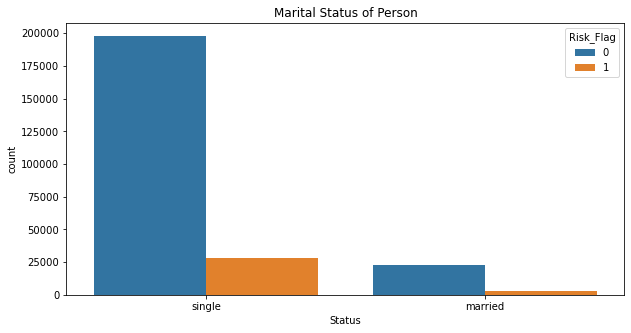

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data['Married/Single'],hue=data['Risk_Flag'])
plt.title("Marital Status of Person")
plt.xlabel('Status')
plt.show()

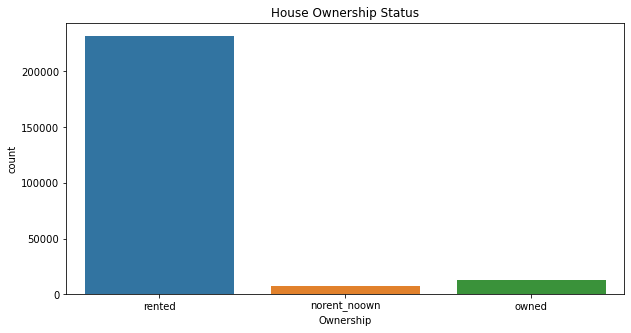

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data['House_Ownership'])
plt.title('House Ownership Status')
plt.xlabel('Ownership')
plt.show()

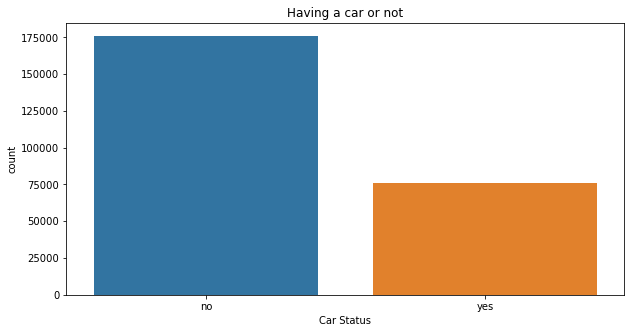

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data['Car_Ownership'])
plt.title('Having a car or not')
plt.xlabel('Car Status')
plt.show()

In [13]:
data['Car_Ownership']=data['Car_Ownership'].map({'no':0,'yes':1})

In [14]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,0,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,1,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [15]:
data['Married/Single']=data['Married/Single'].map({'single':0,'married':1})

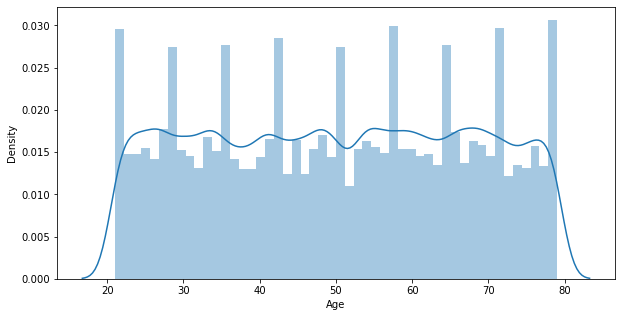

In [16]:
plt.figure(figsize=(10,5))
sns.distplot(data['Age']);

<AxesSubplot:xlabel='Experience', ylabel='Density'>

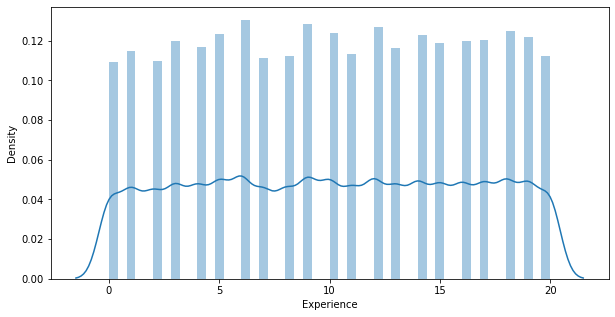

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(data['Experience'])

<AxesSubplot:xlabel='CURRENT_JOB_YRS', ylabel='Count'>

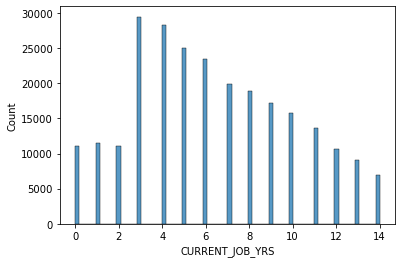

In [18]:
sns.histplot(data['CURRENT_JOB_YRS'])

In [19]:
print('No of Profession',data['Profession'].nunique())
print('No of City {}'.format(data['CITY'].nunique()))
print('No of States {}'.format(data['STATE'].nunique()))

No of Profession 51
No of City 317
No of States 29


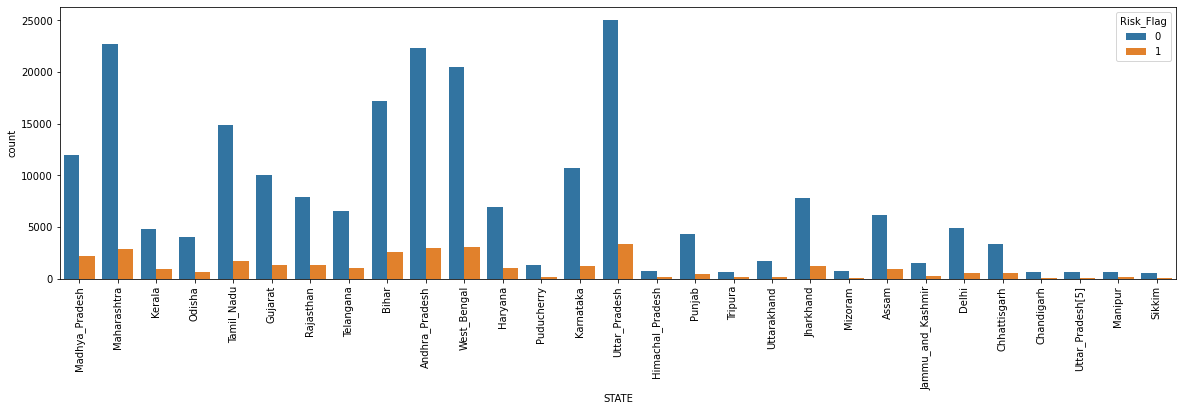

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(data['STATE'],hue=data['Risk_Flag'])
plt.xticks(rotation=90);

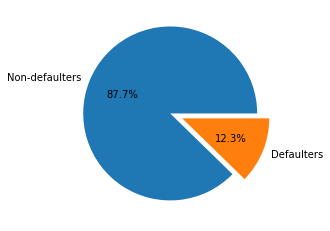

In [21]:
r=data.groupby('Risk_Flag')['Risk_Flag'].count()
plt.pie(r,labels=['Non-defaulters','Defaulters'],autopct='%1.1f%%',explode=[0.05,0.1])
plt.show()

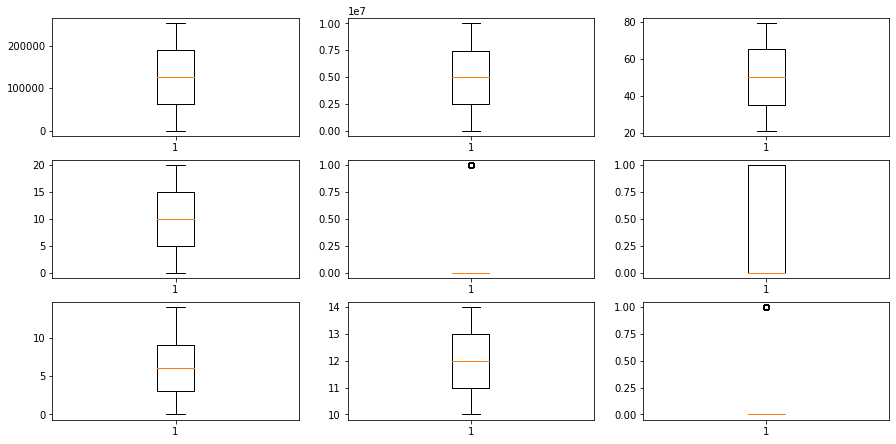

In [22]:
numerical=data.select_dtypes(include=[np.number])
plt.figure(figsize=(15,10))
i=0
for cols in list(numerical.columns):
    i+=1
    plt.subplot(4,3,i)
    plt.boxplot(data[cols])

In [23]:
# from above diagram we can see that there are no outlier

In [24]:
from scipy.stats import chi2_contingency

In [25]:
def chi_square_test(data):
    stat,p,dof,expected=chi2_contingency(data)
    alpha=0.05
    print("p value is "+str(p))
    if p<=alpha:
        print("Reject H0")
        print("They are Dependent")
        
    else:
        print("Accept H0")
        print("They are not dependent")

In [26]:
data.head(1)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,0,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0


In [27]:
car_owner_risk_flag=pd.crosstab(data['Car_Ownership'],data['Risk_Flag'])

In [28]:
car_owner_risk_flag

Risk_Flag,0,1
Car_Ownership,,
0,153439,22561
1,67565,8435


In [29]:
chi_square_test(car_owner_risk_flag)

p value is 1.7350853850183746e-33
Reject H0
They are Dependent


In [30]:
House_owner_risk_flag=pd.crosstab(data['House_Ownership'],data['Risk_Flag'])
House_owner_risk_flag

Risk_Flag,0,1
House_Ownership,,
norent_noown,6469,715
owned,11758,1160
rented,202777,29121


In [31]:
chi_square_test(House_owner_risk_flag)

p value is 1.8381930028370595e-40
Reject H0
They are Dependent


In [32]:
married_risk_flag=pd.crosstab(data['Married/Single'],data['Risk_Flag'])
married_risk_flag

Risk_Flag,0,1
Married/Single,,
0,197912,28360
1,23092,2636


In [33]:
chi_square_test(married_risk_flag)

p value is 3.7730537057152214e-26
Reject H0
They are Dependent


In [34]:
from sklearn.decomposition import PCA

In [35]:
features=['CURRENT_JOB_YRS','Experience']
feature_pca=data[features]
scaled_feature_pca=(feature_pca-feature_pca.mean(axis=0))/feature_pca.std()
scaled_feature_pca

,CURRENT_JOB_YRS,Experience
0,-0.914129,-1.180230
1,0.731035,-0.014067
2,-0.639935,-1.013635
3,-1.188323,-1.346825
4,-0.914129,0.152528
...,...,...
251995,-0.091547,0.485718
251996,-0.091547,-0.014067
251997,0.182647,-0.513851
251998,-1.736711,-1.680014


In [36]:
pca=PCA()
data_pca=pca.fit_transform(scaled_feature_pca)
data_pca=pd.DataFrame(data_pca,columns=['PC1','PC2'])

In [37]:
data_pca.head()

,PC1,PC2
0,-1.480935,-0.188162
1,0.506973,-0.526866
2,-1.169251,-0.264246
3,-1.792620,-0.112078
4,-0.538533,0.754240


In [38]:
df=pd.concat([data,data_pca],axis=1)
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,PC1,PC2
0,1,1303834,23,3,0,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,-1.480935,-0.188162
1,2,7574516,40,10,0,rented,0,Software_Developer,Parbhani,Maharashtra,9,13,0,0.506973,-0.526866
2,3,3991815,66,4,1,rented,0,Technical_writer,Alappuzha,Kerala,4,10,0,-1.169251,-0.264246
3,4,6256451,41,2,0,rented,1,Software_Developer,Bhubaneswar,Odisha,2,12,1,-1.792620,-0.112078
4,5,5768871,47,11,0,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,-0.538533,0.754240


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
feature=['House_Ownership','Profession','CITY','STATE']
label=LabelEncoder()
for col in feature:
    df[col]=label.fit_transform(df[col])

In [41]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,PC1,PC2
0,1,1303834,23,3,0,2,0,33,251,13,3,13,0,-1.480935,-0.188162
1,2,7574516,40,10,0,2,0,43,227,14,9,13,0,0.506973,-0.526866
2,3,3991815,66,4,1,2,0,47,8,12,4,10,0,-1.169251,-0.264246
3,4,6256451,41,2,0,2,1,43,54,17,2,12,1,-1.792620,-0.112078
4,5,5768871,47,11,0,2,0,11,296,22,3,14,1,-0.538533,0.754240


In [42]:
df.drop(['Id'],axis=1,inplace=True)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,PC1,PC2
0,1303834,23,3,0,2,0,33,251,13,3,13,0,-1.480935,-0.188162
1,7574516,40,10,0,2,0,43,227,14,9,13,0,0.506973,-0.526866
2,3991815,66,4,1,2,0,47,8,12,4,10,0,-1.169251,-0.264246
3,6256451,41,2,0,2,1,43,54,17,2,12,1,-1.792620,-0.112078
4,5768871,47,11,0,2,0,11,296,22,3,14,1,-0.538533,0.754240


In [43]:
X=df.drop(['Risk_Flag'],axis=1)
y=df['Risk_Flag']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((201600, 13), (50400, 13), (201600,), (50400,))

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
from sklearn.metrics import classification_report

# Logistic Regression

In [50]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
LR_predict=LR.predict(X_test)

In [51]:
LR.score(X_test,y_test)

0.8759325396825397

In [52]:
confusion_matrix(y_test,LR_predict)

array([[44147,     0],
       [ 6253,     0]], dtype=int64)

In [53]:
print(classification_report(y_test,LR_predict))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.00      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400

